In [28]:
import numpy as np
#logistic回归梯度上升优化算法(也可以叫梯度下降)
def loaddata():
    datamat = []
    label = []
    with open('/Users/enjlife/machine-learning/machinelearninginaction/ch05/testSet.txt') as fr:
        for line in fr.readlines():
            arr = line.strip().split()
            datamat.append([1.0,float(arr[0]),float(arr[1])])
            label.append(int(arr[2]))
    return datamat,label
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
def gradasc(datamat,label):
    datama = np.array(datamat)
    labelma = np.expand_dims(np.array(label),axis=1)
    m,n = np.shape(datama)
    a = 0.001
    cycles = 500
    weights = np.ones((n,1))
    for k in range(cycles):
        #print(np.dot(datamat,weights))
        h = sigmoid(np.dot(datamat,weights))
        error = labelma-h
        weights = weights + a*np.dot(datama.transpose(),error)
    #print(datama)
    return weights,datama,labelma
        

In [29]:
datamat,label = loaddata()
#print(datamat)
weights,datama,labelma = gradasc(datamat,label)

In [30]:
datama[1,1]

-1.395634

In [31]:
#画出决策边界
import matplotlib.pyplot as plt
def plotfit(datamat,label):
    weights,datama,labelma = gradasc(datamat,label)
    n = datama.shape[0]
    xc1=[]
    yc1=[]
    xc2=[]
    yc2=[]
    #print(datama)
    for i in range(n):
        if labelma[i]==1:
            xc1.append(datama[i,1])
            yc1.append(datama[i,2])
        else:
            #print(datama[i,1])
            xc2.append(datama[i,1])
            yc2.append(datama[i,2])
    plt.figure()
    plt.subplot(111)
    plt.scatter(xc1,yc1,s=30,c='red')
    plt.scatter(xc2,yc2,s=30,c='green')
    x = np.linspace(-3,3,60)#range只接受整数步长
    y = (-weights[0]-weights[1]*x)/weights[2]#取边界点
    plt.plot(x,y,c='black')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    

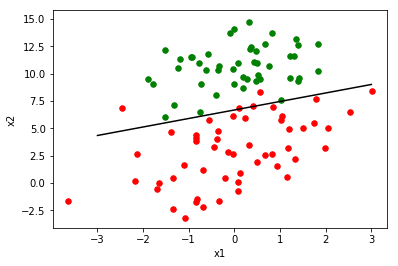

In [32]:
plotfit(datamat,label)

In [67]:
#随机梯度下降法
def stogradasc(datamat,label,inum,batch_size):
    datama = np.array(datamat)
    labelma = np.expand_dims(np.array(label),axis=1)
    m,n = np.shape(datama)
    weights = np.ones((n,1))
    batch = int(m/batch_size)
    for i in range(inum):
        for j in range(batch):
            a = 0.001
            baj = batch_size*j
            baj1 = batch_size*(j+1)
            if baj1>m : baj1=m
            dataid = datama[baj:baj1,:]
            labelid = labelma[baj:baj1,:]
            #print(np.dot(dataid,weights))
            h = sigmoid(np.dot(dataid,weights))
            error = labelid-h
            weights = weights + a*np.dot(dataid.transpose(),error)
    return weights

In [68]:
weights=stogradasc(datamat,label,1000,50)
weights

array([[ 5.43820834],
       [ 0.57816326],
       [-0.78801246]])

In [291]:
a = np.random.rand(3,1)
a[1,:]

array([0.17367724])

In [50]:
#随机梯度下降法可视化
def stoplotfit(datamat,label,weightnew):
    weig,datama,labelma = gradasc(datamat,label)
    n = datama.shape[0]
    print(weightnew)
    xc1=[]
    yc1=[]
    xc2=[]
    yc2=[]
    for i in range(n):
        if labelma[i]==1:
            xc1.append(datama[i,1])
            yc1.append(datama[i,2])
        else:
            #print(datama[i,1])
            xc2.append(datama[i,1])
            yc2.append(datama[i,2])
    plt.figure()
    plt.subplot(111)
    plt.scatter(xc1,yc1,s=30,c='red')
    plt.scatter(xc2,yc2,s=30,c='green')
    x = np.linspace(-3,3,60)#range只接受整数步长
    y = (-weightnew[0]-weightnew[1]*x)/weights[2]#取边界点
    plt.plot(x,y,c='black')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

[[ 5.43820834]
 [ 0.57816326]
 [-0.78801246]]


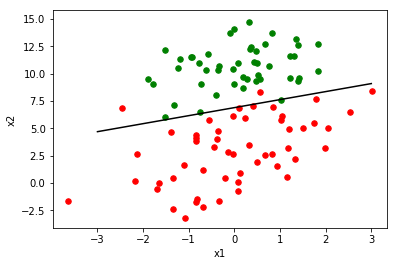

In [58]:
stoplotfit(datamat,label,weights)

In [65]:
  
def colic():
    with open('/Users/enjlife/machine-learning/machinelearninginaction/ch05/horseColicTraining.txt') as fr:
        trset = []
        trlabel = []
        for line in fr.readlines():
            curline = line.strip().split('\t')
            trset.append(np.array(curline[:21]).astype(float))
            trlabel.append(float(curline[21]))
    with open('/Users/enjlife/machine-learning/machinelearninginaction/ch05/horseColicTest.txt') as fr:
        teset = []
        telabel = []
        for line in fr.readlines():
            curline = line.strip().split('\t')
            teset.append(np.array(curline[:21]).astype(float))
            telabel.append(float(curline[21]))
    return trset,trlabel,teset,telabel

In [81]:
#用logistic回归进行分类
def classvec(x,weights):
    prob = sigmoid(np.dot(x,weights))
    yprob = prob > 0.5
    #print(yprob)
    return yprob

In [66]:
trset,trlabel,teset,telabel = colic()

299
299


In [69]:
trweights = stogradasc(trset,trlabel,500,50)

In [82]:
testset = np.array(teset)
testlabel = np.expand_dims(np.array(telabel),axis=1)
yprob = classvec(testset,trweights)
lente = testset.shape[0]
count = 0
for i in range(lente):
    if int(yprob[i]) != int(telabel[i]):
        count += 1
print('the error rate:%s' %(float(count)/lente))

(67, 21)
the error rate:0.26865671641791045


In [77]:
trweights.shape

(21, 1)